<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Advanced Data Science<br/>Natural Language Processing</center>

# S1. Challenge. Clasificación multiclase

En este **challenge** vamos a aprender a predecir etiquetas de *posts* de [StackOverflow](https://stackoverflow.com). Técnicamente, es una tarea de clasificación multiclase. Nótese que el lenguaje en el que están escritas las entradas es el **INGLÉS**, con lo que algunos de los pasos serás específicos para dicho idioma.

## Librerías

Haremos uso de las siguientes librerías
- [Numpy](http://www.numpy.org) 
- [Pandas](https://pandas.pydata.org) 
- [scikit-learn](http://scikit-learn.org/stable/index.html)
- [NLTK](http://www.nltk.org) — librería básica para trabajar con texto en Python

aunque si quieres pudes usar spaCy para algunas tareas.

##  Preprocesado

Una de las primeras técnicas que vamos a utilizar para preprocesar textos es la eliminación de las conocidas como **stop words**, es decir, palabras que no aportan mucho significado, pero que son necesarias para que el texto sea legible y siga las normas. Para ello, lo primero es conseguir una lista con las *stop words* del lenguaje requerido.

Una opción para conseguir esta lista de palabras, es usar la librería `nltk`.

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
from collections import defaultdict
from IPython.display import clear_output


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jedapa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip install wordcloud

En el *challenge* tenemos un dataset con títulos de entradas de StackOverflow, debidamente etiquetado (con 100 etiquetas distintas).

In [3]:
from ast import literal_eval
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [5]:
train = read_data('data/train.tsv')
train, validation = train_test_split(train, test_size = .15, random_state = 0)
test = read_data('data/test.tsv')

In [58]:
train

,title,tags
96598,How to create an array of leaf nodes of an htm...,"[javascript, arrays, dom]"
10007,how to make maven use test resources,"[java, maven]"
15802,How do I get the path where the user installed...,[java]
9114,why are my buttons not showing up?,"[java, swing]"
34247,How to loop an array with strings as indexes i...,"[php, arrays, string, loops]"
...,...,...
21243,Calculating Page Load Time In JavaScript,[javascript]
45891,Increasing speed of a pure Numpy/Scipy convolu...,"[python, algorithm, numpy]"
42613,international Count sms characters,"[javascript, jquery]"
43567,Detecting blank generated images with php?,[php]


Como vemos, la columna *title* contiene los títulos de las entradas, y la columna *tags* una lista con las etiquetas de cada entrada, que puede ser un número arbitrario.

Para seguir los convenios, inicializamos `X_train`, `X_val`, `X_test`, `y_train`, `y_val`.

In [59]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test,y_test = test['title'].values,test['tags'].values

La principal dificultad de trabajar con lenguaje natural es que no está estructurado. Si cojemos el texto y creamos tokens simplemente separando por los espacios, tendremos *tokens* como '3.5?', 'do.', etc. Para evitar esos problemas, es útil preprocesar el texto.

### **Tarea 1 (Preprocesado):**

Implementa la función `text_tokenizer()` y `text_prepare()` siguiendo las instrucciones.

In [8]:
from string import ascii_lowercase
import re

REPLACE_BY_SPACE = '[/(){}\[\]\|@,;]'
GOOD_CHARS = ascii_lowercase+''.join([str(n) for n in range(10)])+' #+_'
STOPWORDS = set(stopwords.words('english'))


def text_tokenizer(text):
    """
    Transforma un texto (str) en una lista de palabras/tokens (list).
    Es importante usar esta función siempre para ser consistentes.
    """
    ## ESCRIBE AQUÍ TU CÓDIGO
    # replace for tokenizer
    #return[token.text for token in text]
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(text)
    #return text.split()
    ##


def text_prepare(text):
    """
    Preprocesa el texto inicial:
    1. eliminando espacios al inicio y final, y convirtiéndolo a minúsculas
    2. cambia los caracteres de REPLACE_BY_SPACE por espacios
    3. elimina los caracteres que no estén en GOOD_CHARS
    4. elimina los tokens que sean STOPWORDS
    5. une los tokens de nuevo en una sóla string
    
    text: str
    return: str
    """
    ## ESCRIBE AQUÍ TU CÓDIGO
    # Eliminar espacios al principio y al final conviertiendolo a minusculas
    text = text.strip().lower()
    # Cambiamos los caracteres de REPLACE_BY_SPACE por espacios
    for i in REPLACE_BY_SPACE:
        text = text.replace(i," ")
    # Eliminamos caracteres que no esten en GOOD_CHARS
    for i in text:
        if i not in GOOD_CHARS:
            text = text.replace(i,"")
    # Eliminamos caracteres que sean STOPWORDS y unimos en un string de nbuevo 
    lista_tokens = text_tokenizer(text)
    lista_tokens = [x for x in lista_tokens if x not in STOPWORDS]
    text_clean = ' '.join(lista_tokens)
    return text_clean

In [9]:
def test_text_prepare():
    examples = ["   SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Respuesta incorrecta para: '%s'" % text_prepare(ex)
    return '¡Tests correctos!'

print(test_text_prepare())

¡Tests correctos!


Ahora preprocesamos los textos de todos los conjuntos:

In [10]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

TRAIN


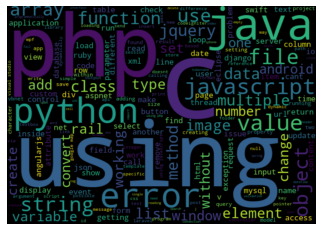

TEST


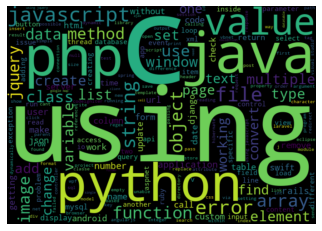

VALIDATION


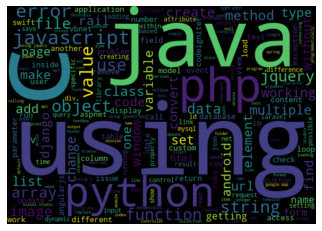

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

str1 = " " 

wordcloud_train = WordCloud(width=680, height=480, margin=0).generate(str1.join(X_train))
wordcloud_val = WordCloud(width=680, height=480, margin=0).generate(str1.join(X_val))
wordcloud_test = WordCloud(width=680, height=480, margin=0).generate(str1.join(X_test))


lista = [wordcloud_test,wordcloud_val,wordcloud_train]
graph = ['TRAIN','TEST','VALIDATION']
for i,j in zip(lista,graph):
    print(j)
    #plt.add_subplot(1, 0, i)
    plt.imshow(i, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [12]:
######################################
##ESCRIBE AQUÍ TU CÓDIGO
######################################
from collections import Counter

# Tokenizamos
tokenizer = nltk.tokenize.ToktokTokenizer()

# Words
all_words = []
for sentence in X_train:
    all_words += tokenizer.tokenize(sentence)
# Tags
tags = []
for i in y_train:
    tags +=i

# Diccionario con todas las etiquetas del corpus de entrenamiento con sus cuentas
tags_counts = dict(Counter(tags))
# Diccionario con todas las palabras del corpus de entrenamiento con sus cuentas
words_counts = dict(Counter(all_words))


Exploramos las más comunes:

In [13]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:4]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:4]
print(most_common_tags)
print(most_common_words)

[('c#', 16259), ('javascript', 16219), ('java', 15835), ('php', 11853)]
[('using', 7000), ('php', 4776), ('java', 4685), ('file', 4318)]


### Transformando el texto a vectores

Vamos a construir los vectores asociados a cada frase en dos representaciones distintas.


#### Bag of words

Recuerda que para crear la representación de *bag of words*, convertimos cada frase en un vector que cuenta el número de ocurrencias de cada token. Se siguien los pasos:
1. Encuentra los **N** tokens mas comunes del corpus de entrenamiento y se les asigna un índice, este es nuestro **vocabulario**. Creamos un diccionario para convertir de tokens a índices y viceversa.
2. Para cada frase en el corpus, creamos un vector de dimensión **N** y lo inicializamos con ceros.
3. Iteramos sobre los tokens de cada frase, y si el token está en el diccionario, incrementamos en 1 el índice correspondiente del vector.
   
**Tarea 3 (BagOfWords):** 

Contruye la función que transforma un texto en su representación *bag of words*.

Implementa la codificación de *bag of words* en la función `my_bag_of_words()` con un tamaño de diccionario de **N=5000**. Para definir el diccionario, sólo podemos usar el conjunto de entrenamiento, sino tendríamos un *data leaking*.

Primero, contruimos el vocabulario y los diccionarios correspondientes, así como un `set` con las palabras del diccionario.

In [14]:
DICT_SIZE = 5000
    
## ESCRIBE AQUÍ TU CÓDIGO

n=0
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE]
only_common_words = [x[n] for x in most_common_words]
INDEX_TO_WORDS = {i : most_common_words[i][0] for i in range(0,len(most_common_words))}
WORDS_TO_INDEX = {}
for index,word in enumerate (list(only_common_words)):
    WORDS_TO_INDEX[word]=index
##
ALL_WORDS = WORDS_TO_INDEX.keys()
assert len(ALL_WORDS)==DICT_SIZE

In [15]:
def my_bag_of_words(text, words_to_index, dict_size):
    """
    text: str
    words_to_index: dict, diccionario con los índices del vocabulario
    dict_size: int, tamaño del diccionario
    
    return
    result_vector: numpy.array, vector con la representación bag-of-words de `text`
    """
    result_vector = np.zeros(dict_size)
    ### ESCRIBE AQUÍ TU CÓDIGO
    count_items = defaultdict(int)
    for i in ''.join(text).split():
        if i in words_to_index.keys():
            count_items[i] += 1
    for key,i in count_items.items():
        result_vector[words_to_index[key]] = i
    #print(result_vector)
    return result_vector

In [16]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Respuesta incorrecta: '%s'" % ex
    return '!Tests correctos¡'

print(test_my_bag_of_words())

!Tests correctos¡


Ahora aplicamos la función anterior a todos los datos.

La representación *bag of words* devuelve vectores __*sparse*__ (la mayoría de sus entradas son ceros), con lo que conviene usar estructuras de datos especiales para datos *sparse* para ser eficientes.

Hay muchos [tipos de representación sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html), y `sklearn` sólo trabaja con la representación [csr matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix), que es la que usamos.

In [17]:
from scipy import sparse as sp_sparse

In [18]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
clear_output()
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)


X_train shape  (85000, 5000)
X_val shape  (15000, 5000)
X_test shape  (30000, 5000)


#### tf-idf

En vez de hacerlo desde cero, podemos usar la clase [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de `sklearn`. Como siempre, para entrenar el codificador sólo se puede usar el set de entrenamiento.

Investiga los argumentos que definen `TfidfVectorizer`. Puedes filtrar las palabras muy raras y también las demasiado frecuentes. También permite utilizar combinaciones de palabras como tokens, es decir, n-gramas. Por último, el tokenizador por defecto separa palabras como 'c++' o 'c#' en varios tokens, pero esto no nos interesa, con lo que vamos a indicar que sólo separe por espacios con el parámetro `token_pattern`.

Puedes usar:
* `min_df=5`
* `max_df=0.9`
* `ngram_range=(1,2)` 
* `token_pattern='(\S+)'`

**Tarea 4 (tf-idf):** 

Contruye la función `tfidf_features()` que transforma el corpus en su representación *tf-idf*.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_features(X_train, X_val, X_test):
    """
    X_train, X_val, X_test — samples        
    return TF-IDF vectorized representation of each sample and vocabulary 
    """
    ## ESCRIBE AQUÍ TU CÓDIGO
    
    # Create TF-IDF vectorizer with a proper parameters choice
    tfidf_vectorizer = TfidfVectorizer(min_df=5,max_df=0.9,ngram_range=(1,2),token_pattern=r"(\S+)")
    
    # Ajusta tfidf_vectorizer al set de entrenamiento
    tfidf_vectorizer.fit(X_train)
    
    # Transforma los sets de train, test, and val
    X_train_tfidf = tfidf_vectorizer.transform(X_train) 
    X_val_tfidf = tfidf_vectorizer.transform(X_val) 
    X_test_tfidf =tfidf_vectorizer.transform(X_test) 
    ##
    return X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vectorizer.vocabulary_


In [20]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [21]:
X_train_tfidf.shape,X_val_tfidf.shape,X_test_tfidf.shape

((85000, 15708), (15000, 15708), (30000, 15708))

In [22]:
assert 'c++' in tfidf_vocab.keys()
assert 'c#' in tfidf_vocab.keys()

### Clasificador multi-clase con sklearn

El resultado de nuestro clasificador puede consistir en varias etiquetas. Lo primero que tenemos que hacer, es convertir los `y` en números, convirtiendo cada uno en un vector de 0's y 1's indicando la presencia de cada una de las etiquetas.

Esto se puede hacer automáticamente con [MultiLabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) de `sklear`.

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

In [71]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)
y_test = mlb.fit_transform(y_test)

In [25]:
mlb.classes_

array(['.net', 'ajax', 'algorithm', 'android', 'angularjs', 'apache',
       'arrays', 'asp.net', 'asp.net-mvc', 'c', 'c#', 'c++', 'class',
       'cocoa-touch', 'codeigniter', 'css', 'csv', 'database', 'date',
       'datetime', 'django', 'dom', 'eclipse', 'entity-framework',
       'excel', 'facebook', 'file', 'forms', 'function', 'generics',
       'google-maps', 'hibernate', 'html', 'html5', 'image', 'ios',
       'iphone', 'java', 'javascript', 'jquery', 'json', 'jsp', 'laravel',
       'linq', 'linux', 'list', 'loops', 'maven', 'mongodb',
       'multithreading', 'mysql', 'node.js', 'numpy', 'objective-c',
       'oop', 'opencv', 'osx', 'pandas', 'parsing', 'performance', 'php',
       'pointers', 'python', 'python-2.7', 'python-3.x', 'qt', 'r',
       'regex', 'rest', 'ruby', 'ruby-on-rails', 'ruby-on-rails-3',
       'selenium', 'servlets', 'session', 'sockets', 'sorting', 'spring',
       'spring-mvc', 'sql', 'sql-server', 'string', 'swift', 'swing',
       'twitter-bootstrap'

In [26]:
print(y_train[:4])

[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### **Tarea 5 (Entrenamiento):** 

Implementa la función `train_classifier()` que entrena un clasificador dados los datos de entrenamiento. 

Como ya sabes, una clasificación multi-clase con $L$ etiquetas, se puede estudiar como $L$ clasificadores binarios. Esto se puede hacer en el formato *Uno contra todos*, que está implementado en [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html).

Como clasificador base se puede usar [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Es uno de los métodos más simples, pero generalmente funciona bien en tareas de clasificación de texto.

In [27]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [28]:
def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.

    ######################################
    ### ESCRIBE AQUÍ TU CÓDIGO 
    ###################################### 
    model = OneVsRestClassifier(LogisticRegression(max_iter=1000,))
    model.fit(X_train,y_train)
    ### 
    return model

Entrena un modelo para cada una de las features que hemos construido: *bag-of-words* y *tf-idf*. Y luego calcula las predicciones sobre el conjunto de validación, vamos a necesitar las predicciones (labels) y las probabilidades (scores) para poder calcular métricas como la ROC curve.

In [48]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

In [30]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

Veamos algún ejemplo:

In [53]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	imlementing custom irouter aspnet 5 vnext mvc 6
True labels:	asp.net-mvc,c#
Predicted labels:	asp.net,c#


Title:	uiwebview application using proxy server
True labels:	ios,objective-c
Predicted labels:	


Title:	formal argument type matched multiple actual arguments
True labels:	r
Predicted labels:	


Title:	android java embed online video
True labels:	android,java
Predicted labels:	android,java


Title:	python copying one work sheet another excel
True labels:	excel,python,python-2.7
Predicted labels:	excel,python




### Evaluación

Para evaluar el modelo de clasificación multi-clase, usaremos las siguientes métricas:

 - [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
 - [F1-score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
 - [Area under ROC-curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
 - [Area under precision-recall curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) 

Estudia el significado de cada de las métricas, teniendo en cuenta que estamos ante un problema multi-clase y no binario. Lee sobre micro/macro/weighted averaging en la documentación de `sklearn`.

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

### **Tarea 6 (Evaluación):** 

Implementa la función `print_evaluation_scores()` que calcula e imprime las siguientes métricas:
 - *accuracy*
 - *F1-score macro/micro/weighted*
 - *Precision macro/micro/weighted*
 
Utiliza para ello las implementaciones de estas métricas de `sklearn`.

In [33]:
def print_evaluation_scores(y_val, predicted):
    ######################################
    ### ESCRIBE AQUÍ TU CÓDIGO 
    ######################################
    list_of_averege = ['macro','micro','weighted']
    print("\nACCURACY:",accuracy_score(y_val, predicted))
    for i in list_of_averege:
        print ("\nF1-SCORE for:",i,f1_score(y_val, predicted, average=i))
    #print("\nROC_AUC_SCORE:",roc_auc_score(y_val, predicted, multi_class='ovr'))
    print("\nAVERAGE_PRECISION_SCORE",average_precision_score(y_val, predicted))
    #for j in list_of_averege:
        #print ("\nRECALL SCORE for:",j,recall_score(y_val, predicted, average=j))


In [34]:
print('Bag-of-words:')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('\nTfidf:')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Bag-of-words

ACCURACY: 0.3552

F1-SCORE for: macro 0.49290520637070534

F1-SCORE for: micro 0.6642540029877755

F1-SCORE for: weighted 0.6426165019529592

AVERAGE_PRECISION_SCORE 0.33238966386646573

Tfidf

ACCURACY: 0.3268

F1-SCORE for: macro 0.43165864934971965

F1-SCORE for: micro 0.6281810875971069

F1-SCORE for: weighted 0.6023040515980348

AVERAGE_PRECISION_SCORE 0.2874915694651835


Es interesante mostrar una generalización de la [ROC curve](http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc) para el caso multi-clase. Utiliza la función `roc_auc()` para ello. Los parámetros de entrada son:
 - y_test : etiquetas correctas (labels)
 - y_score: probabilidades, (score decision function)
 - n_classes: número de clases

In [35]:
from metrics import roc_auc
%matplotlib inline

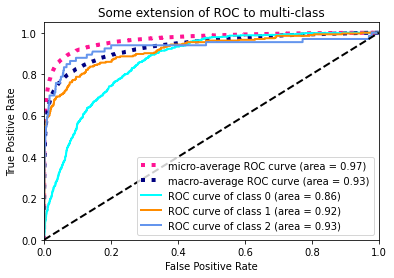

In [36]:
# ROC AUC BoW
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

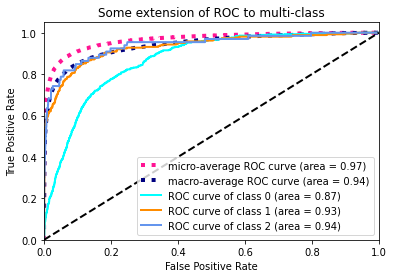

In [37]:
# ROC AUC TF-IDF
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

### Extra : Hyper parameter tuning

Una vez hemos entrenado un modelo y lo hemos evaluado, podemos proceder a hacer ajuste de hiperparámetros, para ello usaremos como métrica de validación *F1-score weighted*, **sobre los datos de validación**.

Pasos:
* Compara la calidad de bag of words y TF-IDF y elige uno.
* Investiga cambiando los parámetros de la regularización *L1* y *L2* de la Logistic Regression (e.g. C con valores de 0.1, 1, 10, 100). 

Puedes elegir también otro clasificador base, como Random Forest. O modificar el preprocessing.

Para finalizar, evalua el mejor modelo (sobre la métrica de validación) en el **set de test** para estimar sus métricas.

In [ ]:
# F1-score es una manera de combinar "precision" y "recall" en una sola metrica. Es como tener un resumen del rendimiento del modelo en un solo valor.
# Para ello utiliza el valor medio (armonico) de precision y recall --> F1-score = 2 × (precision × recall)/(precision + recall)
# F1-score-macro : Se refiere a todas las clases
# F1-score-micro: Se refiere al valor por cada clase
# F1-score-weighted: Se pondera la puntuacion F1 de cada clase.

# Si atendemos a las metricas del paso anterior, BoW obtiene un valore de F1-weighted ligeramente superior a tf-idf.

# Vamos a evaluar ambas features BoW y tf-idf, probando a hiperparametrizar un poco.

In [38]:
######################################
### ESCRIBE AQUÍ TU CÓDIGO 
######################################

# TF-IDF con solver lbfgs y L2 penalty(-- lbfgs’ solver support only L2 regularization with primal formulation, or no regularization
# ) para cada uno de los valores de penalty de la lista 
p = [0.1, 1, 10, 100]


for i in p:
    model_tfidf_1 = OneVsRestClassifier(LogisticRegression(max_iter=1000,C=i)).fit(X_train_tfidf,y_train)
    predicted_label_tfidf = model_tfidf_1.predict(X_val_tfidf)
    print("\nEvaluating penalty of :",i,"using solver lbfgs")
    print_evaluation_scores(y_val, predicted_label_tfidf)
    


Evaluating penalty of : 0.1 using solver lbfgs

ACCURACY: 0.17146666666666666

F1-SCORE for: macro 0.11945279575264767

F1-SCORE for: micro 0.41274133362176196

F1-SCORE for: weighted 0.37337191056550045

AVERAGE_PRECISION_SCORE 0.08644040260851227

Evaluating penalty of : 1 using solver lbfgs

ACCURACY: 0.3268

F1-SCORE for: macro 0.43165864934971965

F1-SCORE for: micro 0.6281810875971069

F1-SCORE for: weighted 0.6023040515980348

AVERAGE_PRECISION_SCORE 0.2874915694651835

Evaluating penalty of : 10 using solver lbfgs

ACCURACY: 0.3594

F1-SCORE for: macro 0.4983977477081176

F1-SCORE for: micro 0.6698006692258739

F1-SCORE for: weighted 0.6499026240296643

AVERAGE_PRECISION_SCORE 0.3302643922943412

Evaluating penalty of : 100 using solver lbfgs

ACCURACY: 0.3182

F1-SCORE for: macro 0.47420842574825434

F1-SCORE for: micro 0.6352197666228847

F1-SCORE for: weighted 0.6230830659356994

AVERAGE_PRECISION_SCORE 0.29008028447884676


In [43]:
# Segundo ejemplo con solver = liblinear y penalty L1
p = [0.1, 1, 10, 100]
for i in p:
    model_tfidf_2 = OneVsRestClassifier(LogisticRegression(max_iter=1000,C=i,solver='liblinear',penalty='l1')).fit(X_train_tfidf,y_train)
    predicted_label_tfidf = model_tfidf_2.predict(X_val_tfidf)
    print("\nEvaluating penalty of :",i,"using solver liblinear")
    print()"############"
    print_evaluation_scores(y_val, predicted_label_tfidf)


Evaluating penalty of : 0.1 using solver liblinear

ACCURACY: 0.2829333333333333

F1-SCORE for: macro 0.4212508914963069

F1-SCORE for: micro 0.5822272843495038

F1-SCORE for: weighted 0.5604799270190645

AVERAGE_PRECISION_SCORE 0.28146463747399175

Evaluating penalty of : 1 using solver liblinear

ACCURACY: 0.36186666666666667

F1-SCORE for: macro 0.5067168255946656

F1-SCORE for: micro 0.6696633955893215

F1-SCORE for: weighted 0.6488513706841521

AVERAGE_PRECISION_SCORE 0.34431829683326476

Evaluating penalty of : 10 using solver liblinear

ACCURACY: 0.3376

F1-SCORE for: macro 0.5028716779928251

F1-SCORE for: micro 0.6571511123952615

F1-SCORE for: weighted 0.6439878629895561

AVERAGE_PRECISION_SCORE 0.31917251355596515

Evaluating penalty of : 100 using solver liblinear

ACCURACY: 0.24586666666666668

F1-SCORE for: macro 0.43497722256918053

F1-SCORE for: micro 0.5788683024536805

F1-SCORE for: weighted 0.581483884813409

AVERAGE_PRECISION_SCORE 0.24677118939336476


In [75]:
# Vamos a ver los resultados sobre BoW con solver lbfgs
p = [0.1, 1, 10, 100]
for i in p:
    model_bow_1 = OneVsRestClassifier(LogisticRegression(max_iter=1000,C=i)).fit(X_train_mybag,y_train)
    predicted_label_mybag = model_bow_1.predict(X_val_mybag)
    print("\nEvaluating penalty of :",i,"using solver lbfgs")
    print_evaluation_scores(y_val, predicted_label_mybag)


Evaluating penalty of : 0.1 using solver lbfgs

ACCURACY: 0.3048

F1-SCORE for: macro 0.41680395068465953

F1-SCORE for: micro 0.6077614658017526

F1-SCORE for: weighted 0.5804655672302368

AVERAGE_PRECISION_SCORE 0.28512980025588347

Evaluating penalty of : 1 using solver lbfgs

ACCURACY: 0.3552

F1-SCORE for: macro 0.49290520637070534

F1-SCORE for: micro 0.6642540029877755

F1-SCORE for: weighted 0.6426165019529592

AVERAGE_PRECISION_SCORE 0.33238966386646573

Evaluating penalty of : 10 using solver lbfgs

ACCURACY: 0.3456

F1-SCORE for: macro 0.4981228021699821

F1-SCORE for: micro 0.6612491015094641

F1-SCORE for: weighted 0.6452585937414075

AVERAGE_PRECISION_SCORE 0.31799311055021584

Evaluating penalty of : 100 using solver lbfgs

ACCURACY: 0.308

F1-SCORE for: macro 0.4584547298839927

F1-SCORE for: micro 0.6312895033321241

F1-SCORE for: weighted 0.6226067593581185

AVERAGE_PRECISION_SCORE 0.26651780318471335


In [76]:
# Vamos a ver los resultados sobre BoW con solver liblinear y penalty L1
p = [0.1, 1, 10, 100]
for i in p:
    model_bow_2 = OneVsRestClassifier(LogisticRegression(max_iter=1000,C=i,solver='liblinear',penalty='l1')).fit(X_train_mybag,y_train)
    predicted_label_mybag = model_bow_2.predict(X_val_mybag)
    print("\nEvaluating penalty of :",i,"using solver lbfgs")
    print_evaluation_scores(y_val, predicted_label_mybag)


Evaluating penalty of : 0.1 using solver lbfgs

ACCURACY: 0.32393333333333335

F1-SCORE for: macro 0.46694879066342343

F1-SCORE for: micro 0.6284824902723736

F1-SCORE for: weighted 0.6041036504712527

AVERAGE_PRECISION_SCORE 0.3259612595086431

Evaluating penalty of : 1 using solver lbfgs

ACCURACY: 0.3618

F1-SCORE for: macro 0.5065133317105392

F1-SCORE for: micro 0.671697642509667

F1-SCORE for: weighted 0.6506025539922384

AVERAGE_PRECISION_SCORE 0.34296842656323767

Evaluating penalty of : 10 using solver lbfgs

ACCURACY: 0.3268

F1-SCORE for: macro 0.48883779521314785

F1-SCORE for: micro 0.6494013132483585

F1-SCORE for: weighted 0.6389770527276223

AVERAGE_PRECISION_SCORE 0.299920953643248

Evaluating penalty of : 100 using solver lbfgs

ACCURACY: 0.27986666666666665

F1-SCORE for: macro 0.41843460413607575

F1-SCORE for: micro 0.6065900044228217

F1-SCORE for: weighted 0.6061743565394972

AVERAGE_PRECISION_SCORE 0.22706234465952133


In [73]:
# METRICAS SOBRE EL CONJUNTO DE TEST - Con penalty = 10 obtenemos las mejores metricas

# El mejor valor de F1-score-weighted es con c=10 en tf-idf

model_h = OneVsRestClassifier(LogisticRegression(max_iter=1000,C=10)).fit(X_train_tfidf,y_train)
predicted_label_tfidf_h = model_h.predict(X_test_tfidf)
print_evaluation_scores(y_test, predicted_label_tfidf_h)


ACCURACY: 0.3614

F1-SCORE for: macro 0.5028547809074543

F1-SCORE for: micro 0.6728305806162557

F1-SCORE for: weighted 0.6513722360491525

AVERAGE_PRECISION_SCORE 0.33635438062923134


### Extra: Interpretabilidad del modelo

En la práctica es muy importante explorar las features (en este caso las palabras o n-gramas) que tienen pesos más altos en el modelo de regresión logística (en el caso de árboles de decisión también hay feature importance).

Implementa la función `print_words_for_tag()` para encontrarlas. Investiga la documentación de [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) y [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) para saber como acceder a los coeficientes de la regresión.

In [41]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    # Extract an estimator from the classifier for the given tag.
    # Extract feature coefficients from the estimator. 

    ######################################
    ### ESCRIBE AQUÍ TU CÓDIGO 
    ######################################
    estimador = classifier.estimators_[tags_classes.index(tag)]
        
    ##### Multi-line version ######
    
    # ---> argsort returns the indices which would sort an array.
    
    #top_positive_words = []
    #coef_sorted = estimador.coef_.argsort().tolist()[0][-10:]
    #for index in coef_sorted:
    #     top_positive_words.append(index_to_words[index])
    
    #top_negative_words = []
    #coef_sorted = estimador.coef_.argsort().tolist()[0][10:]
    #for index in coef_sorted:
    #     top_negative_words.append(index_to_words[index])
    
    ##### One line version #####
    top_positive_words = [index_to_words[index] for index in estimador.coef_.argsort().tolist()[0][-10:]]
    top_negative_words = [index_to_words[index] for index in estimador.coef_.argsort().tolist()[0][:10]]
    
    ###
    print('Top palabras positivas:\t{}'.format(', '.join(top_positive_words)))
    print('Top palabras negativas:\t{}\n'.format(', '.join(top_negative_words)))

In [42]:
print_words_for_tag(classifier_tfidf, 'python', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'c', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'c++', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'linux', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)

Tag:	python
Top palabras positivas:	scrapy, beautifulsoup, django, sqlalchemy, tkinter, flask, matplotlib, numpy, pandas, python
Top palabras negativas:	php, java, c#, javascript, jquery, c++, rails, r, c, swift

Tag:	c
Top palabras positivas:	char, struct, kernel, linux, printf, pointer, gcc, scanf, malloc, c
Top palabras negativas:	java, php, python, javascript, c#, objective c, objective, jquery, c++, class

Tag:	c++
Top palabras positivas:	g++, boostasio, stdstring, c++11, stl, opencv, mfc, boost, qt, c++
Top palabras negativas:	java, php, python, javascript, c#, jquery, ruby, r, swift, rails

Tag:	linux
Top palabras positivas:	gcc, script, execute, signal, address, shared, unix, c, ubuntu, linux
Top palabras negativas:	javascript, c#, array, jquery, method, aspnet, value, page, string, image

